# Covid-19  - Data Preparation

This notebook shows how the data used to Predict the Global Spread of COVID-19 is derived. As this is an evolving situation, you may use all available data at a given time, and are encouraged to keep incorporating new data as it becomes available. 

In this notebook, we download the latest figures from https://github.com/CSSEGISandData/COVID-19, add some additional information, group by Country/Region, re-shape into the format required for submission and show how you can score your model on the latest data without needing to upload submissions to Zindi. 

## Downloading the Data

The data has been curated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), and is pubically available on their GitHub repository. We clone the repository to get the data.


In [6]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
Updating files:  39% (320/816)
Updating files:  40% (327/816)
Updating files:  41% (335/816)
Updating files:  42% (343/816)
Updating files:  43% (351/816)
Updating files:  44% (360/816)
Updating files:  45% (368/816)
Updating files:  46% (376/816)
Updating files:  47% (384/816)
Updating files:  48% (392/816)
Updating files:  49% (400/816)
Updating files:  50% (408/816)
Updating files:  51% (417/816)
Updating files:  52% (425/816)
Updating files:  53% (433/816)
Updating files:  54% (441/816)
Updating files:  55% (449/816)
Updating files:  56% (457/816)
Updating files:  57% (466/816)
Updating files:  58% (474/816)
Updating files:  59% (482/816)
Updating files:  60% (490/816)
Updating files:  61% (498/816)
Updating files:  62% (506/816)
Updating files:  63% (515/816)
Updating files:  64% (523/816)
Updating files:  65% (531/816)
Updating files:  66% (539/816)
Updating files:  67% (547/816)
Updating files:  68% (555/816)
Updating files:  69% (564/816)
Updating fil

## Loading the Data

In [2]:
import pandas as pd

### Cases data

In [10]:
cases = pd.read_csv(r'C:/Users/ssoziu/Desktop/Data Insights/Covid 19 predictions/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644


### Deaths data

In [12]:
deaths = pd.read_csv(r'C:/Users/ssoziu/Desktop/Data Insights/Covid 19 predictions/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1945,1956,1965,1969,1995,2011,2025,2030,2047,2067
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,977,989,1003,1016,1028,1040,1055,1066,1074,1088
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2575,2584,2596,2609,2623,2631,2640,2647,2659,2666
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,78,78,79,79,79,79,79,80,80,81
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,365,366,371,372,372,379,382,384,386,387


# Adding All Countries 
This section will be updated as new Countries/Regions are added to the JHU data, to try and maintain a consistent mapping.

In [14]:
# Download a list of countries from the UN
!curl -o EF.xlsx https://untermportal.un.org/unterm/country/downloadfile?targetLanguage=fr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 11184  100 11184    0     0   3804      0  0:00:02  0:00:02 --:--:--  3802


In [15]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.head(2)

,English short,French short,English formal,French formal
0,Afghanistan,Afghanistan (l'),the Islamic Republic of Afghanistan,la République islamique d'Afghanistan
1,Albania,Albanie (l'),the Republic of Albania,la République d'Albanie


### Data formatting

In [16]:
# Which regions in the JHU data have direct matches in countries?
print(deaths.shape, deaths['Country/Region'].unique().shape)
print(deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique().shape)

(271, 338) (191,)
(157,)


In [17]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  deaths.loc[deaths['Country/Region'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  cases.loc[cases['Country/Region'] == c, 'Territory'] = c

deaths.loc[deaths['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'

In [18]:
# The problem ones we need to reconcile manually:
print(deaths.loc[~deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique())

['Bahamas' 'Bolivia' 'Brunei' 'Burma' 'Central African Republic' 'Comoros'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' "Cote d'Ivoire"
 'Diamond Princess' 'Dominican Republic' 'Gambia' 'Holy See' 'Iran'
 'Korea, South' 'Kosovo' 'Laos' 'MS Zaandam' 'Marshall Islands' 'Moldova'
 'Netherlands' 'Niger' 'Philippines' 'Russia' 'Sudan' 'Syria' 'Taiwan*'
 'Tanzania' 'US' 'United Arab Emirates' 'United Kingdom' 'Venezuela'
 'Vietnam' 'West Bank and Gaza']


In [19]:
# Add them manually:
deaths.loc[deaths['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
deaths.loc[deaths['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
deaths.loc[deaths['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
deaths.loc[deaths['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
deaths.loc[deaths['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
deaths.loc[deaths['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
deaths.loc[deaths['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
deaths.loc[deaths['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
deaths.loc[deaths['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
deaths.loc[deaths['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['Country/Region'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
cases.loc[cases['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
cases.loc[cases['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
cases.loc[cases['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
cases.loc[cases['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
cases.loc[cases['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
cases.loc[cases['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
cases.loc[cases['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
cases.loc[cases['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
cases.loc[cases['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
cases.loc[cases['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
cases.loc[cases['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
cases.loc[cases['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['Country/Region'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)

Dropping ['Burma' 'Comoros' 'Diamond Princess' 'Holy See' 'Kosovo' 'MS Zaandam'
 'Marshall Islands' 'West Bank and Gaza']
(271, 339)
(263, 339)
Dropping ['Burma' 'Comoros' 'Diamond Princess' 'Holy See' 'Kosovo' 'MS Zaandam'
 'Marshall Islands' 'West Bank and Gaza']
(271, 339)
(263, 339)


In [20]:
# Add the rest of the countries with cases set to 0 (!! Use with caution as data may be unreported)
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)

Adding: ['Comoros (the)' 'Kiribati' 'Marshall Islands (the)'
 'Micronesia (Federated States of)' 'Myanmar' 'Nauru' 'Palau'
 'Republic of Korea (the)' 'Sudan (the)' 'Tonga' 'Turkmenistan' 'Tuvalu']
(275, 339)
(275, 339)


# Splitting out some regions into their own territories

Some regions are listed as part of one country, but due to geography or politics can be considered a separate entity. Without getting too political, let's separate out a few of these.

In [21]:
# Taiwan, St. Martin, Faroe Islands, St. Barthelemy, French Polynesia, French Guiana, Mayotte, Guadeloupe, Curacao, Cayman Islands, Reunion, Aruba, monserrat, Greenland, new caledonia, Bermuda.
for r in ['St Martin', 'Faroe Islands', 'Saint Barthelemy', 'French Polynesia', 'French Guiana', 'Mayotte',
          'Guadeloupe', 'Curacao', 'Cayman Islands', 'Reunion', 'Aruba', 'Montserrat', 'Greenland', 'New Caledonia', 'Bermuda']:
  if deaths.loc[deaths['Province/State']==r].shape[0]<1:
    print(r)
  deaths.loc[deaths['Province/State']==r, 'Territory'] = r
  cases.loc[cases['Province/State']==r, 'Territory'] = r


## Adding Population info

This is optional, but this section adds population info. Use with caution, and feel free to make manual corrections. 

In [24]:
# Run if needed
!pip install countryinfo 

In [25]:
from countryinfo import CountryInfo

pops = {}
fails = []

regions = sorted(deaths['Territory'].unique())
for r in regions:
  try:
    country = CountryInfo(r)
    pops[r] = country.info()['population']
  except:
    fails.append(r)
    print('No pop data for', r)

No pop data for Andorra
No pop data for Bahamas (the)
No pop data for Bolivia (Plurinational State of)
No pop data for Brunei Darussalam
No pop data for Cabo Verde
No pop data for Central African Republic (the)
No pop data for Comoros (the)
No pop data for Congo (the)
No pop data for Curacao
No pop data for Czechia
No pop data for Côte d'Ivoire
No pop data for Democratic People's Republic of Korea (the)
No pop data for Democratic Republic of the Congo (the)
No pop data for Dominican Republic (the)
No pop data for Eswatini
No pop data for Gambia (the)
No pop data for Iran (Islamic Republic of)
No pop data for Lao People's Democratic Republic (the)
No pop data for Marshall Islands (the)
No pop data for Micronesia (Federated States of)
No pop data for Montenegro
No pop data for Myanmar
No pop data for Netherlands (the)
No pop data for Niger (the)
No pop data for North Macedonia
No pop data for Philippines (the)
No pop data for Republic of Korea (the)
No pop data for Republic of Moldova (t

In [26]:
# Adding in population as a column
cols = list(deaths.columns)
deaths['Population'] = deaths['Country/Region'].map(pops)
deaths = deaths[cols[:2]+['Territory','Population']+cols[2:-1]] # Better ordering
deaths.head()

,Province/State,Country/Region,Territory,Population,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,Afghanistan,26023100.0,33.93911,67.709953,0,0,0,0,...,1945,1956,1965,1969,1995,2011,2025,2030,2047,2067
1,NaN,Albania,Albania,2895947.0,41.15330,20.168300,0,0,0,0,...,977,989,1003,1016,1028,1040,1055,1066,1074,1088
2,NaN,Algeria,Algeria,38700000.0,28.03390,1.659600,0,0,0,0,...,2575,2584,2596,2609,2623,2631,2640,2647,2659,2666
3,NaN,Andorra,Andorra,NaN,42.50630,1.521800,0,0,0,0,...,78,78,79,79,79,79,79,80,80,81
4,NaN,Angola,Angola,24383301.0,-11.20270,17.873900,0,0,0,0,...,365,366,371,372,372,379,382,384,386,387


## Some Quick Visualizations

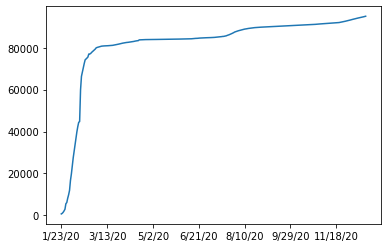

In [30]:
# Cases for mainland China (note - data is cumulative)
cases.groupby('Territory').sum().loc['China'][3:].plot()

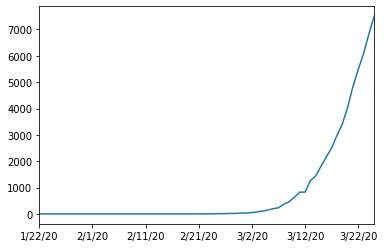

In [0]:
# Deaths in Italy
deaths.groupby('Territory').sum().loc['Italy'][3:].plot()

## Creating Training data

This is how the 'train.csv' file is generated:

In [31]:
TEST_PERIOD=7
train_dates = deaths.columns[6:-TEST_PERIOD] # The dates for the train perion

# Grouping by territory
country_deaths = deaths.groupby('Territory').sum()[train_dates] 
country_cases = cases.groupby('Territory').sum()[train_dates] 

# Creating the dataframe
train = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'target':country_deaths.stack(),
    'cases':country_cases.stack() # Added as they may be useful
}).reset_index(drop=True)

# Add Separate Region and Date columns
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[1])

# Saving and viewing
train.to_csv('train.csv', index=False)
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


### Creating test data

In [34]:

test_dates = deaths.columns[-TEST_PERIOD:] # The dates for the train perion

# Grouping by territory
country_deaths = deaths.groupby('Territory').sum()[test_dates] 
country_cases = cases.groupby('Territory').sum()[test_dates] 

# Creating the dataframe
test = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'target':country_deaths.stack(),
    'cases':country_cases.stack() # Added as they may be useful
}).reset_index(drop=True)

# Add Separate Region and Date columns
test['Territory'] = test['Territory X Date'].apply(lambda x: x.split(' X ')[0])
test['Date'] = test['Territory X Date'].apply(lambda x: x.split(' X ')[1])

# Saving and viewing
test.to_csv('test.csv', index=False)
test.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 12/14/20,1969,48718,Afghanistan,12/14/20
1,Afghanistan X 12/15/20,1995,48952,Afghanistan,12/15/20
2,Afghanistan X 12/16/20,2011,49161,Afghanistan,12/16/20
3,Afghanistan X 12/17/20,2025,49378,Afghanistan,12/17/20
4,Afghanistan X 12/18/20,2030,49621,Afghanistan,12/18/20
